# 1. Overview 

The goal of this notebook is

- (**Gathering Data**) to gather data related to tweets in [WeRateDog](https://twitter.com/dog_rates) in three ways: by reading from csv file `twitter-archive-enhanced.csv` available [here](https://d17h27t6h515a5.cloudfront.net/topher/2017/August/59a4e958_twitter-archive-enhanced/twitter-archive-enhanced.csv), downloading through Twitter API and downloading by using library `requests` from [here](https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv). 

- (**Assessing Data**) to assess the data obtained in the previous step by 
using visual and programmatic methods and list up some quality issues and tidyness issues.

- (**Cleaning Data**) to clean the data based on the assessment in the previous step
and create cleaned dataframes. 

- (**Storing, Analyzing and Visualizing Data**) to store the cleaned dataframes into 
csv file(s) and analyze the cleaned data with visual and statistical methods.


# 2. Gathering Data

In this part we will gather the data related to 
tweets in [WeRateDog](https://twitter.com/dog_rates) in three ways as follows:

- Read tweet data from the csv file `twitter-archive-enhanced.csv`

- Download data for the tweet image predictions from Udacity server 
[Udacity server](https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv) by using the python library `requests`.

- Download tweet data in the json format through Twitter API (and store it in the text file `tweet_json.txt`).

We will use these three data and create three individual dataframe first 
(these dataframes are named as `df_arxiv`, `df_predict`, `df_download`, respectively).


In [1]:
# import some libraries to be used through out this report
import pandas as pd 
import numpy as np
import json
import requests
import tweepy
import re 
import matplotlib.pyplot as plt

## 2.1. Read data from CSV file

In [2]:
# read tweet data from 'twitter-archive-enhanced.csv' and generate a dataframe
df_arxiv = pd.read_csv('twitter-archive-enhanced.csv')  

## 2.2. Download data with requests library

In [3]:
# downloading the tweet image predictions from the Udacity server 
# and write into "image-predictions.tsv"
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(url)
with open("image-predictions.tsv", "wb") as file:
    file.write(r.content)
    
# read data from "image-predictions.tsv" and generate a datafreme
df_predict = pd.read_csv('image-predictions.tsv', sep = "\t") 

## 2.3. Download data with Twitter API

In [4]:
# NOTICE: IN ORDER FOR THIS PART TO WORK,  
# ADD YOUR OWN TWITTER API KEYS AND ACCESS TOKENS

# some preparation for getting tweets through twitter API
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit = True, wait_on_rate_limit_notify = True)

# use twitter API to get tweets and write their json data to the text file 'tweet_json.txt'
tweet_id_list = df_arxiv["tweet_id"]

existing_id = []
missing_id = [] 

with open('tweet_json.txt', 'w') as outfile:
    for id_tweet in tweet_id_list:
        try:
            tweet = api.get_status(int(id_tweet), tweet_mode='extended')
            json.dump(tweet._json, outfile)
            outfile.write('\n')
            existing_id.append(int(id_tweet))
        except: 
            print("ID:" + str(id_tweet) + " does not exist.")
            missing_id.append(int(id_tweet))

Rate limit reached. Sleeping for: 338
ID:888202515573088257 does not exist.
ID:869988702071779329 does not exist.
ID:861769973181624320 does not exist.
ID:802247111496568832 does not exist.
ID:775096608509886464 does not exist.
Rate limit reached. Sleeping for: 627
Rate limit reached. Sleeping for: 635


In [5]:
# read the text file 'tweet_json.txt' and create a dataframe
json_list = []
with open('tweet_json.txt') as f:
    for line in f:
        json_list.append(json.loads(line))

df_download = pd.DataFrame.from_dict(json_list, orient='columns')

# 3. Assessing Data

The next step is to assess the data. Here we list up some quality issues and 
tidiness issues of the data by using visual and programmatic assessment. 
(Since the data contain so many quality/tidiness issues, 
here we list up some of them only.)

## 3.1. Detecting issues

### Visual assessment

For the visual assessment, here we take a look at the data frames 
`df_arxiv`, `df_download` and `df_predict`:

In [6]:
df_arxiv

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [7]:
df_download

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,None,None,Tue Aug 01 16:23:56 +0000 2017,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",39410,False,This is Phineas. He's a mystical boy. Only eve...,None,...,False,NaN,NaN,NaN,8808,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,None,None,Tue Aug 01 00:17:27 +0000 2017,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",33735,False,This is Tilly. She's just checking pup on you....,None,...,False,NaN,NaN,NaN,6456,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,None,None,Mon Jul 31 00:18:03 +0000 2017,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",25408,False,This is Archie. He is a rare Norwegian Pouncin...,None,...,False,NaN,NaN,NaN,4282,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,None,None,Sun Jul 30 15:58:51 +0000 2017,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",42775,False,This is Darla. She commenced a snooze mid meal...,None,...,False,NaN,NaN,NaN,8890,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,None,None,Sat Jul 29 16:00:24 +0000 2017,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",40930,False,This is Franklin. He would like you to stop ca...,None,...,False,NaN,NaN,NaN,9686,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
5,None,None,Sat Jul 29 00:08:17 +0000 2017,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891087942176911360, 'id_str'...",20519,False,Here we have a majestic great white breaching ...,None,...,False,NaN,NaN,NaN,3224,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
6,None,None,Fri Jul 28 16:27:12 +0000 2017,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890971906207338496, 'id_str'...",12036,False,Meet Jax. He enjoys ice cream so much he gets ...,None,...,False,NaN,NaN,NaN,2132,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
7,None,None,Fri Jul 28 00:22:40 +0000 2017,"[0, 118]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890729118844600320, 'id_str'...",66580,False,When you watch your owner call another dog a g...,None,...,False,NaN,NaN,NaN,19495,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
8,None,None,Thu Jul 27 16:25:51 +0000 2017,"[0, 122]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 890609177319665665, 'id_str'...",28154,False,This is Zoey. She doesn't want to be one of th...,None,...,False,NaN,NaN,NaN,4377,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
9,None,None,Wed Jul 26 15:59:51 +0000 2017,"[0, 133]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890240245463175168, 'id_str'...",32408,False,This is Cassie. She is a college pup. Studying...,None,...,False,NaN,NaN,NaN,7653,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835'

In [8]:
df_predict

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


From these, we can visually see the following quality/tidiness issues:

- (**tidiness issue in `df_arXiv`**) the information on the "dog stage" is stored in the three different 
columns in `df_arxiv` (`doggo`, `pupper`, `puppo`).

- (**quality issue in `df_arXiv`**) some data are missing in the columns `doggo`, `pupper`, `puppo`.

- (**quality issue in `df_arXiv`**) some tweets are retweets (`text` starts with "RT").

- (**quality issue in `df_arXiv`**) some dogs' names in `name` are incorrect (for example, "such").

- (**quality issue in `df_arXiv`**) information on rating is stored separately in `rating_numerator` 
and `rating_denominator`.

- (**tidiness issue in `df_arXiv`**) observations on the tweets and images of dog coexist. (For example, `timestamp` is information on the tweet, while `name`  is information on the dog in the image.)

- (**tidinesss issue in `df_download`**) `display_text_range` contains 
the starting location of the tweet as well as the ending location of it as a list 
with length 2 in each entry. 

Now we use some programming methods to find more quality and tidiness issues.

### Programmatic assessment 1

Let us first look at `rating_numerator` and `rating_denominator` in `df_arxiv`:

In [9]:
# a set of numbers appearing in the `rating_numerator`/`rating_denominator`
print("rating_numerator:\n", df_arxiv["rating_numerator"].unique())
print("rating_denominator:\n", df_arxiv["rating_denominator"].unique())

rating_numerator:
 [  13   12   14    5   17   11   10  420  666    6   15  182  960    0   75
    7   84    9   24    8    1   27    3    4  165 1776  204   50   99   80
   45   60   44  143  121   20   26    2  144   88]
rating_denominator:
 [ 10   0  15  70   7  11 150 170  20  50  90  80  40 130 110  16 120   2]


We can see that `rating demoninator` takes value 0. The corresponding row is 

In [10]:
df_arxiv[df_arxiv["rating_denominator"] == 0]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None


Especially, `text` of this row is

In [11]:
# display the full text for this row
ind = df_arxiv[df_arxiv["rating_denominator"] == 0].index.values[0]
df_arxiv[df_arxiv["rating_denominator"] == 0]["text"][ind]

"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho"

Thus, the correct rating for this row should be 13/10, but because `text` of this tweet 
contains two (number)/(number)'s (960/00 and 13/10), the ratings are incorrectly extracted and stored in `rating_numerator` and `rating_denominator`. 

For all the tweets in `df_arxiv`, let us extract (number)/(number)'s from the `text`:

In [12]:
# extract strings of the form "numbers/numbers" from the text in df_arxiv
list_rate = []
to_be_checked_rating = []
for i in range(df_arxiv.shape[0]):
    rate = re.findall("-?\d+/\d+", df_arxiv["text"][i])
    list_rate.append(rate)
    if(len(rate) != 1):
        to_be_checked_rating.append(df_arxiv["tweet_id"][i])
              
# list up the tweets with more than one "numbers/numbers" extracted
print("tweet_id with multiple (number)/(number)'s in text:\n", to_be_checked_rating, "\n")

# For example the tweet with tweet id: 666287406224695296 
# should have the rating 9/10 instead of 1/2
print("tweet_id:", 666287406224695296)
ind = df_arxiv[df_arxiv["tweet_id"] == 666287406224695296].index.values[0]
print("text:", df_arxiv["text"][ind])
print("rating_numerator:", df_arxiv["rating_numerator"][ind],
      "rating_denominator:",df_arxiv["rating_denominator"][ind])

tweet_id with multiple (number)/(number)'s in text:
 [881633300179243008, 835246439529840640, 802624713319034886, 777684233540206592, 775096608509886464, 763167063695355904, 747600769478692864, 740373189193256964, 722974582966214656, 716439118184652801, 714258258790387713, 703356393781329922, 695064344191721472, 694352839993344000, 691483041324204033, 690400367696297985, 689835978131935233, 682962037429899265, 677314812125323265, 676191832485810177, 674737130913071104, 674646392044941312, 673295268553605120, 672248013293752320, 671154572044468225, 670434127938719744, 669037058363662336, 668537837512433665, 667544320556335104, 667491009379606528, 667070482143944705, 666835007768551424, 666287406224695296] 

tweet_id: 666287406224695296
text: This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv
rating_numerator: 1 rating_denominator: 2


Thus multiple (number)/(number)'s in `text` indeed lead to incorrect `rating_numerator` 
and `rating_denominator`. 

We also note that the actual rating of the tweet with `tweet_id`:667550882905632768 
is negative (this example is a retweet and thus will be removed in the end, though):

In [13]:
# take a look at the text of this tweet;
ind = df_arxiv[df_arxiv["tweet_id"] == 667550882905632768].index.values[0]
df_arxiv["text"][ind]

'RT @dogratingrating: Unoriginal idea. Blatant plagiarism. Curious grammar. -5/10 https://t.co/r7XzeQZWzb'

As a summary of this part, we have found that 

- (**quality issue in df_arxiv**) some ratings stored in `rating_numerator` 
and `rating_denominator` are inconsistent with those in `text` because of 
multiple (number)/(number)'s appearing in `text` (expecially, 
`rating_denominator` in the tweet with `tweet_id`:835246439529840640) is zero, 
the rating can be negative).   

### Programmatic assessment 2

Let us take a look at `lang` of df_download:

In [14]:
# a set of languages used in the tweets in `df_download`
df_download["lang"].unique()

array(['en', 'und', 'in', 'eu', 'es', 'nl', 'tl', 'ro', 'et'], dtype=object)

Thus it seems that some tweets are done in non-English languages (and some are undetremined "und"). We can explicitly see the `id` (tweet id) and `full_text` of these tweets as follows:

In [15]:
# list up non-English languages used in the tweet in `df_download`
df_download[df_download["lang"] != "en"][["id", "full_text", "lang"]]

,id,full_text,lang
31,886054160059072513,RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,und
162,860177593139703809,RT @dog_rates: Ohboyohboyohboyohboyohboyohboyo...,in
287,838150277551247360,@markhoppus 182/10,und
406,823333489516937216,@HistoryInPics 13/10,und
616,796125600683540480,#ImWithThor 13/10\nhttps://t.co/a18mzkhTf6,und
865,761672994376806400,Ohboyohboyohboyohboyohboyohboyohboyohboyohboyo...,in
977,749403093750648834,Duuun dun... duuun dun... dunn dun. dunn dun....,eu
1075,738891149612572673,@mount_alex3 13/10,und
1340,704491224099647488,13/10 hero af\n@ABC,es
1518,690607260360429569,12/10 @LightningHoltt,und


It seems that the item with `id`:682697186228989953 should be `und` and the `lang` of the other tweets which are not `und` in this list should be replaced by `en`. 

To summarize this part, we have found

- (**quality issue in `df_download`**) Some entries in `lang` of `df_download` are incorrect.


### Programmatic assessment 3

In `df_download`, we can see the list of the column names:

In [16]:
df_download.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2351 entries, 0 to 2350
Data columns (total 31 columns):
contributors                     0 non-null object
coordinates                      0 non-null object
created_at                       2351 non-null object
display_text_range               2351 non-null object
entities                         2351 non-null object
extended_entities                2072 non-null object
favorite_count                   2351 non-null int64
favorited                        2351 non-null bool
full_text                        2351 non-null object
geo                              0 non-null object
id                               2351 non-null int64
id_str                           2351 non-null object
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null object
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 non-null obj

Now let us focus on the four pairs, (`id`, `id_str`),  (`in_reply_to_status_id`, `in_reply_to_status_id_str`), (`in_reply_to_user_id`, `in_reply_to_user_id_str`) and 
(`quoted_status_id`, `quoted_status_id_str`). After converting `..._str` to the 
integer type data, the two entries in each pair are exactly the same:

In [17]:
# count the number of non-null entries matching in each pair:
print("number of entries matching between id and id_str:",
      sum(df_download["id"] == df_download["id_str"].astype(np.int64)))
print("number of entries matching between in_reply_to_status_id and in_reply_to_status_id_str:", 
    sum(df_download[df_download["in_reply_to_status_id"].notnull()]["in_reply_to_status_id"] == 
    df_download[df_download["in_reply_to_status_id_str"].notnull()]["in_reply_to_status_id_str"].astype(np.int64)))
print("number of entries matching between in_reply_to_user_id and in_reply_to_user_id_str:", 
    sum(df_download[df_download["in_reply_to_user_id"].notnull()]["in_reply_to_user_id"] == 
    df_download[df_download["in_reply_to_user_id_str"].notnull()]["in_reply_to_user_id_str"].astype(np.int64)))
print("number of entries matching quoted_status_id and quoted_status_id_str:", 
    sum(df_download[df_download["quoted_status_id"].notnull()]["quoted_status_id"] == 
    df_download[df_download["quoted_status_id_str"].notnull()]["quoted_status_id_str"].astype(np.int64)))

number of entries matching between id and id_str: 2351
number of entries matching between in_reply_to_status_id and in_reply_to_status_id_str: 78
number of entries matching between in_reply_to_user_id and in_reply_to_user_id_str: 78
number of entries matching quoted_status_id and quoted_status_id_str: 29


Thus all the non-null entries matches in each pair. 
(We note that the numbers of the non-null entries can bee seen in the list 
of the column names just above.)

To summarize we have found 

- (**tidiness issue in df_download**) duplicated columns (`id`, `id_str`), 
 (`in_reply_to_status_id`, `in_reply_to_status_id_str`), 
 (`in_reply_to_user_id`, `in_reply_to_user_id_str`), 
 (`quoted_status_id`, `quoted_status_id_str`). 
 
 
### Programmatic assessment 4

Let us have a look at the datatype of `timestamp` in `df_arxiv`:

In [18]:
# datatype of entries (0th row for example here) in `timestamp` of `df_arxiv`
type(df_arxiv["timestamp"][0])

str

We thus should convert the datatype of `timestamp` from str to timestamp. 
To summarize, we have found 

- (**quality issue in `df_arxiv`**) data type of `timestamp` is str.


### Programmatic assessment 5

Let us have a look at `enhanced_entities` in `df_download`:

In [19]:
# have a look at the example of entries in "extended_entities" of `df_download`
df_download["extended_entities"][0]

{'media': [{'display_url': 'pic.twitter.com/MgUWQ76dJU',
   'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1',
   'id': 892420639486877696,
   'id_str': '892420639486877696',
   'indices': [86, 109],
   'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
   'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
   'sizes': {'large': {'h': 528, 'resize': 'fit', 'w': 540},
    'medium': {'h': 528, 'resize': 'fit', 'w': 540},
    'small': {'h': 528, 'resize': 'fit', 'w': 540},
    'thumb': {'h': 150, 'resize': 'crop', 'w': 150}},
   'type': 'photo',
   'url': 'https://t.co/MgUWQ76dJU'}]}

Here we can see multiple features are contained in a single column. 
Most of the informations are the same as those stored in some other
columns in `df_download` or `df_arxiv`. The interesting entries here are 
"media_url" which stores url for images and 'type' which denotes the type of 
the media used (such as photo):

In [20]:
# extract urls for the images/types of images 
# from the column "extended_entities" of df_download
list_url = []
list_type = []
for i in range(df_download.shape[0]):
    try: # extract urls for images and store in list_url
        d = df_download["extended_entities"][i]['media'][0]['media_url']
        ty = df_download["extended_entities"][i]['media'][0]['type']
        list_url.append(d)
        list_type.append(ty)
    except: # when no urls for images, append None to the list. 
        list_url.append("to_be_removed")
        list_type.append("None")
        
print("example of urls for images:\n", list_url[0:5], "\n")
print("type of images:", set(list_type))

example of urls for images:
 ['http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'http://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg', 'http://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg', 'http://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg', 'http://pbs.twimg.com/media/DF6hr6AVYAAZ8G8.jpg'] 

type of images: {'photo', 'animated_gif', 'None', 'video'}


Thus some of the tweets do not contain any images. (As in the instruction for this project, 
here we are interested in the tweets with images only). 

To summarize, we have found

- (**tidiness issues in `df_download`**) `extended_entities` in `df_download` contains 
multiple observations in the single column.

- (**quality issue in `df_download`**) some tweets in `df_download` do not contain any images.


### Programmatic assessment 6

Here we focus on `favorited` and `retweeted` in `df_download`: 

In [21]:
print("number of True in favorited:", sum(df_download["favorited"]))
print("number of True in retweeted:", sum(df_download["retweeted"]))

number of True in favorited: 0
number of True in retweeted: 0


On the other hand, as can be seen from the visual assessment, 
some tweets have non-zero `favorite_count` and `retweet_count`. 

Thus we have found 

- (**quality issue in `df_download`**) `favorited` and `retweeted` 
are all False (but some should be True)




### Programmatic assessment 7 

Let us have a look at `source` in df_arxiv:

In [22]:
# look at the 1st entry of the column "source"
df_arxiv["source"][0]

'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'

Here we can see that some html codes are contained. What we are interesting is 
the text part only ("Twitter for iPhone" for the above example).

To summarize, we have found, 

- (**quality issue in `df_arxiv` **) `source` in df_arxiv is in the form of html code. 

### Programmatic assessment 8 

In the datrames `df_arixv` and `df_download` we can see a lot of missing values 
on top of those we have encounted above. Here we look at the information of 
the dataframe `df_download` again:

In [23]:
df_download.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2351 entries, 0 to 2350
Data columns (total 31 columns):
contributors                     0 non-null object
coordinates                      0 non-null object
created_at                       2351 non-null object
display_text_range               2351 non-null object
entities                         2351 non-null object
extended_entities                2072 non-null object
favorite_count                   2351 non-null int64
favorited                        2351 non-null bool
full_text                        2351 non-null object
geo                              0 non-null object
id                               2351 non-null int64
id_str                           2351 non-null object
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null object
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 non-null obj

We can see that the column "place" contains a lot of "None". 
(But we note that from the three datasets we are using here, we cannot fix this issue.
The column "geo" and 'coordinates' could be relevant but the entries in these columns 
are all "None".)

To summarize, we have found that 

- (**quality issue in `df_download`**) missing values in `place` (not fixable)




## 3.2. Summary of assessment

Now we summarize the result of the assessment on the previous part: 

### Tidiness issues

- (**T1: tidiness issue in `df_arXiv`**) the information on the "dog stage" is stored in the three different 
columns in `df_arxiv` (`doggo`, `pupper`, `puppo`).

- (**T2: tidiness issue in `df_arXiv`**) observations on the tweets and dogs coexist. (For example, `timestamp` is information of the tweet, while `name`  is information of the dog.)

- (**T3: tidinesss issue in `df_download`**) `display_text_range` contains 
the starting location of the tweet and the ending location of it as a list 
with length 2 in each entry. 

- (**T4: tidiness issue in df_download**) duplicated columns (`id`, `id_str`), 
 (`in_reply_to_status_id`, `in_reply_to_status_id_str`), 
 (`in_reply_to_user_id`, `in_reply_to_user_id_str`), 
 (`quoted_status_id`, `quoted_status_id_str`). 

- (**T5: tidiness issues in df_download**) `extended_entities` in `df_download` contains 
multiple observations in the single column.

### Quality issues

- (**Q1: quality issue in `df_arXiv`**) some data are missing in the columns `doggo`, `pupper`, `puppo`.

- (**Q2: quality issue in `df_arXiv`**) some tweets are retweets (`text` starts with "RT").

- (**Q3: quality issue in `df_arXiv`**) some dogs' names in `name` are incorrect (for example, "such").

- (**Q4: quality issue in df_arxiv**) some ratings stored in `rating_numerator` 
and `rating_denominator` are inconsistent with those in `text` because of 
multiple (number)/(number)'s appearing in `text` (expecially, 
`rating_denominator` in the tweet with `tweet_id`:835246439529840640) is zero, 
the actual rating can be negative). 

- (**Q5: quality issue in `df_arxiv` **) `source` in df_arxiv is in the form of html code. 

- (**Q6: quality issue in `df_arxiv`**) data type of `timestamp` is str.

- (**Q7: quality issue in `df_download`**) Some entries in `lang` of `df_download` are incorrect. 

- (**Q8: quality issue in `df_download`**) some tweets in `df_download` do not contain any images.

- (**Q9: quality issue in `df_download`**) `favorited` and `retweeted` 
are all False (but some should be True)

- (**Q10: quality issue in `df_download`**) missing values in `place` (not fixable)

- (**Q11: quality issue in `df_arXiv`**) informaton on rating is stored separately in `rating_numerator` and `rating_denominator`.

Here we added the labels T1- T5 and Q1-Q10 for the tidiness/quality issues.  When we carry out the cleaning in the next part, we will *not* clean up the issues in the order of the above list but in the order in which the cleaning is easier.


# 4. Cleaning Data

Based on the assessment in the previous part, here we carry out the cleaning 
of the data. 

Before carrying out the cleaning, we first create copies of the dataframes 
(the dataframes we use for the cleanings are `df_arxiv_clean`, 
`df_download_clean` and `df_predict_clean`):

In [24]:
# copy the dataframes for cleaning
df_arxiv_clean = df_arxiv.copy()
df_download_clean = df_download.copy()
df_predict_clean = df_predict.copy()

In this part, we will always work on these copied dataframes. 

### Cleaning 1 

#### -  Issue (T1)
(**T1: tidiness issue in `df_arXiv`**) information on the "dog stage" is stored in the three different 
columns in `df_arxiv` (`doggo`, `pupper`, `puppo`)

#### - Define (T1)
Create a column named "dog_stage" in which each entry takes value 
in (doggo, pupper, puppo) (or None). For the rows for which more than one 
out of three original columns `doggo`, `pupper` and `puppo` take non-trivial 
value (i.e. not `None`), we read off the appropriate values for `dog_stage` 
from the their text. 

#### - Code (T1)

In [25]:
# create a new column "dog_stage" in `df_arxiv_clean`
# if the entries in "doggo", "pupper", "puppo" are not "None", put them to "dog_stage"
df_arxiv_clean["dog_stage"] =  df_arxiv_clean["doggo"] + df_arxiv_clean["pupper"] + df_arxiv_clean["puppo"]
df_arxiv_clean["dog_stage"] = df_arxiv_clean["dog_stage"].str.replace("None", "" ).str.strip()

# if nothing in some rows of "dog_stage", then put None there.
for i in df_arxiv_clean.index.values:
     if(df_arxiv_clean["dog_stage"][i] == ""):
            df_arxiv_clean.loc[i, "dog_stage"] = "None"

# remove the columns "doggo", "pupper", "puppo"            
df_arxiv_clean = df_arxiv_clean.drop(["doggo", "pupper", "puppo"], axis = 1)

In [26]:
# have a look at what kind of value this new column takes
print(df_arxiv_clean["dog_stage"].unique())

['None' 'doggo' 'puppo' 'pupper' 'doggopuppo' 'doggopupper']


We can see the `doggopuppo` `doggopupper` (which comes from the rows 
for which two out of the original columns "doggo", "puppo", "pupper" were filled 
non-trivially). We look at the texts for these tweet carefully: 

In [27]:
# idenfity the indices of these entries and display the text of them
list_1 = list(df_arxiv_clean[df_arxiv_clean["dog_stage"] == "doggopuppo"].index.values)
list_2 = list(df_arxiv_clean[df_arxiv_clean["dog_stage"] == "doggopupper"].index.values)
for ind in list_1 + list_2: 
    print("index:", ind, "\n", df_arxiv_clean["text"][ind] + "\n")

index: 191 
 Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel

index: 460 
 This is Dido. She's playing the lead role in "Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple." 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7

index: 531 
 Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho

index: 565 
 Like doggo, like pupper version 2. Both 11/10 https://t.co/9IxWAXFqze

index: 575 
 This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine https://t.co/55Dqe0SJNj

index: 705 
 This is Pinot. He's a sophisticated doggo. You can tell by the hat. Also pointier than your average pupper. Still 10/10 would pet cautiously https://t.co/f2wmLZTPHd

index: 733 
 Pupper butt 1, Doggo 0. Both 12/10 https://t.co/WQvcPE

We will judge the `dog_stage` from the photo and text.
When multiple dog stages are all correct (say, multiple dogs show up in the image), the first one appearing in the text is selected.

In [28]:
# correcting some dog_stage by reading the information on the dog stage from the text
list_ind = list_1 + list_2 
list_stage = ["puppo", "pupper", "pupper", "doggo", "pupper", "doggo", 
             "pupper", "doggo", "pupper", "doggo", "None", "pupper", "doggo"]
dict_stage = dict(zip(list_ind, list_stage))

for key in list(dict_stage.keys()):
     df_arxiv_clean.loc[key, "dog_stage"] = dict_stage[key]

#### - Test (T1)

Now we can see the new column `dog_stage` in `df_arxiv_clean`, 
while the columns `pupper`, `puppo` `doggo` are removed:

In [29]:
df_arxiv_clean.head(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,floofer,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,None,doggo


We can also confirm that, for the rows for which more than one out of the orignal three columns `puppo`, `pupper` and `doggo` take non-trivial values, the values in `dog_stage` 
are modified. 

In [30]:
df_arxiv_clean["dog_stage"][list_ind]

191      puppo
460     pupper
531     pupper
565      doggo
575     pupper
705      doggo
733     pupper
778      doggo
822     pupper
889      doggo
956       None
1063    pupper
1113     doggo
Name: dog_stage, dtype: object

### Cleaning 2 

#### - Issue (T3)

(**T3: tidinesss issue in `df_download`**) `display_text_range` contains 
the starting location of the tweet a well as the ending location of it as a list 
with length 2 in each entry. 

#### - Define (T3)

Split the column `display_text_range` into two columns `display_text_start` 
and `display_text_end` in which the starting location and end location of the tweets 
are stored separately.

#### - Code (T3)

In [31]:
# split the column "display_text_range" into the two columns
df_download_clean[['display_text_range_start','display_text_range_end']] = pd.DataFrame(df_download_clean["display_text_range"].values.tolist(), index= df_download_clean.index)

# remove the column "display_text_range"
df_download_clean = df_download_clean.drop("display_text_range", axis = 1)

#### - Test (T3)

Now we can see that the column `display_text_range` is removed and 
the two new columns `display_text_start` and `display_text_end` are added.

In [32]:
df_download_clean.head()

,contributors,coordinates,created_at,entities,extended_entities,favorite_count,favorited,full_text,geo,id,...,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user,display_text_range_start,display_text_range_end
0,None,None,Tue Aug 01 16:23:56 +0000 2017,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",39410,False,This is Phineas. He's a mystical boy. Only eve...,None,892420643555336193,...,NaN,NaN,8808,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na...",0,85
1,None,None,Tue Aug 01 00:17:27 +0000 2017,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",33735,False,This is Tilly. She's just checking pup on you....,None,892177421306343426,...,NaN,NaN,6456,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na...",0,138
2,None,None,Mon Jul 31 00:18:03 +0000 2017,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",25408,False,This is Archie. He is a rare Norwegian Pouncin...,None,891815181378084864,...,NaN,NaN,4282,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na...",0,121
3,None,None,Sun Jul 30 15:58:51 +0000 2017,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",42775,False,This is Darla. She commenced a snooze mid meal...,None,891689557279858688,...,NaN,NaN,8890,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na...",0,79
4,None,None,Sat Jul 29 16:00:24 +0000 2017,"{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",40930,False,This is Franklin. He would like you to stop ca...,None,891327558926688256,...,NaN,NaN,9686,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na...",0,138


### Cleaning 3

#### -  Issue (T4)
(**T4: tidiness issue in df_download**) duplicated columns (`id`, `id_str`), 
 (`in_reply_to_status_id`, `in_reply_to_status_id_str`), 
 (`in_reply_to_user_id`, `in_reply_to_user_id_str`), 
 (`quoted_status_id`, `quoted_status_id_str`). 

#### - Define (T4)

remove the columns `id_str`, `in_reply_to_status_id_str`, 
`in_reply_to_user_id_str` and `quoted_status_id_str`. 

#### - Code (T4)

In [33]:
# remove the duplicated columns
df_download_clean = df_download_clean.drop("id_str", axis = 1)
df_download_clean = df_download_clean.drop("in_reply_to_status_id_str", axis = 1)
df_download_clean = df_download_clean.drop("in_reply_to_user_id_str", axis = 1)
df_download_clean = df_download_clean.drop("quoted_status_id_str", axis = 1)

#### - Test (T4)
we can see that these columns are deleted from `df_download_clean`:

In [34]:
df_download_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2351 entries, 0 to 2350
Data columns (total 28 columns):
contributors                     0 non-null object
coordinates                      0 non-null object
created_at                       2351 non-null object
entities                         2351 non-null object
extended_entities                2072 non-null object
favorite_count                   2351 non-null int64
favorited                        2351 non-null bool
full_text                        2351 non-null object
geo                              0 non-null object
id                               2351 non-null int64
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_user_id              78 non-null float64
is_quote_status                  2351 non-null bool
lang                             2351 non-null object
place                            1 non-null object
possibly_sensitive               2210 non-null obje

### Cleaning 4

#### - Issue (T5)
(**T5: tidiness issues in df_download**) `extended_entities` in `df_download` contains 
multiple observations in the single column.

#### - Define (T5)

Extract the data on the urls for the images and type of the images from 
the column `extended_entities`, store them in the two new columns 
`jpg_url` and `image_type`.
(We note that in `df_predict_clean`, the informatin on the urls of the images 
are stored in the column with the same name `jpg_url`. When merging the dataframe, 
we will remove one of the two `jpg_url`'s but here we keep it since the column `jpg_url` 
in `df_download_clean` will be used when cleaning the quality issue Q8.)



#### - Code (T5)

In [35]:
# recall that the data on the urls of the images and type of the image 
# have already been extracted stored in `list_url` and `list_type`
# in the assessment part. 

# create new columns where urls for images an type of them are stored
df_download_clean["jpg_url"] = list_url
df_download_clean["image_type"] = list_type

# remove the column `extended_entities`
df_download_clean = df_download_clean.drop("extended_entities", axis = 1)

#### - Test (T5)

We can see the two columns added and the column `extended_entities` removed:

In [36]:
df_download_clean.head()

,contributors,coordinates,created_at,entities,favorite_count,favorited,full_text,geo,id,in_reply_to_screen_name,...,retweet_count,retweeted,retweeted_status,source,truncated,user,display_text_range_start,display_text_range_end,jpg_url,image_type
0,None,None,Tue Aug 01 16:23:56 +0000 2017,"{'hashtags': [], 'symbols': [], 'user_mentions...",39410,False,This is Phineas. He's a mystical boy. Only eve...,None,892420643555336193,None,...,8808,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na...",0,85,http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,photo
1,None,None,Tue Aug 01 00:17:27 +0000 2017,"{'hashtags': [], 'symbols': [], 'user_mentions...",33735,False,This is Tilly. She's just checking pup on you....,None,892177421306343426,None,...,6456,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na...",0,138,http://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,photo
2,None,None,Mon Jul 31 00:18:03 +0000 2017,"{'hashtags': [], 'symbols': [], 'user_mentions...",25408,False,This is Archie. He is a rare Norwegian Pouncin...,None,891815181378084864,None,...,4282,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na...",0,121,http://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,photo
3,None,None,Sun Jul 30 15:58:51 +0000 2017,"{'hashtags': [], 'symbols': [], 'user_mentions...",42775,False,This is Darla. She commenced a snooze mid meal...,None,891689557279858688,None,...,8890,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na...",0,79,http://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,photo
4,None,None,Sat Jul 29 16:00:24 +0000 2017,"{'hashtags': [{'text': 'BarkWeek', 'indices': ...",40930,False,This is Franklin. He would like you to stop ca...,None,891327558926688256,None,...,9686,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na...",0,138,http://pbs.twimg.com/media/DF6hr6AVYAAZ8G8.jpg,photo


### Cleaning 5 

#### - Issue (Q2)
- (**Q2: quality issue in `df_arXiv`**) some tweets are retweets (`text` starts with "RT").

#### - Define (Q2)
remove the tweets starting with "RT" in `text` 

#### - Code (Q2)

In [37]:
# list up retweets
list_retweet = []
for i in range(df_arxiv_clean.shape[0]):
    if(df_arxiv_clean["text"][i][0:2] == "RT"):
        list_retweet.append(i)

# remove retweets
df_arxiv_clean = df_arxiv_clean.drop(df_arxiv_clean.index[list_retweet])  

#### - Test (Q2)

For example, the tweet with `tweet_id`:888202515573088257 is an retweet. 
We can see that this one does not exist after the cleaning:

In [38]:
# show the text of tweet with tweet_id: 888202515573088257 in the original dataframe
print("in the original dataframe df_arxiv\n", 
      df_arxiv[df_arxiv["tweet_id"] == 888202515573088257][["tweet_id", "text"]])
print("\ntweet with tweet_id: 888202515573088257 exits after cleaning?:", 
          sum(df_arxiv_clean["tweet_id"] == 888202515573088257) > 0)

in the original dataframe df_arxiv
               tweet_id                                               text
19  888202515573088257  RT @dog_rates: This is Canela. She attempted s...

tweet with tweet_id: 888202515573088257 exits after cleaning?: False


### Cleaning 6

#### - Issue (Q8)

(**Q8: quality issue in `df_download`**) some tweets in `df_download` do not contain any images.

#### - Define (Q8) 

remove the tweets for which `jpg_url` does not contain url (but "to_be_removed"). 

#### - Code (Q8)

In [39]:
# remove rows for which the urls for the images are not stored 
# ("to_be_removed" is stored instead)
df_download_clean = df_download_clean[df_download_clean["jpg_url"] !="to_be_removed"]

#### - Test (Q8)

We can see that, after the cleaning, "jpg_url" for all the tweets starts with "http"
(thus the url for the images exists):

In [40]:
count = 0
for i in df_download_clean["jpg_url"].index.values:
    if(df_download_clean["jpg_url"][i][0:4] == "http"):
        count = count + 1 
        
print("total number of tweets:", df_download_clean.shape[0], 
      "\ntotal number of tweets with jpg_url starting with 'http':", count)

total number of tweets: 2072 
total number of tweets with jpg_url starting with 'http': 2072


### Cleaning 7 

#### - Issue (Q4)

(**Q4: quality issue in df_arxiv**) some ratings stored in `rating_numerator` 
and `rating_denominator` are inconsistent with those in `text` because of 
multiple (number)/(number)'s appearing in `text` (expecially, 
`rating_denominator` in the tweet with `tweet_id`:835246439529840640) is zero, 
the actual rating can be negative). 

#### - Define (Q4)

Extract (number)/(number)'s from `text` first. If more than one (number)/(number)'s, 
check the text explicitly. Identify the tweets for which some of (number)/(number)'s 
are in the text are not rating (but something else such as date) or not valid rating. 
For these tweets, extract the correct rating and substitute to `rating_numerator` 
and `rating_denominator` for these tweets. When multiple ratings in the text 
are all correct, we will store the first one in `rating_numerator` 
and `rating_denominator`. 

#### - Code (Q4)

In [41]:
# extract strings of the form "numbers/numbers" from the text in df_arxiv_clean
list_rate = []
to_be_checked_rating = []
for i in df_arxiv_clean.index.values:
    rate = re.findall("-?\d+/\d+", df_arxiv_clean["text"][i])
    list_rate.append(rate)
    if(len(rate) != 1):
        to_be_checked_rating.append(df_arxiv_clean["tweet_id"][i])

# display the full texts for the tweets with multiple (number)/(number)'s
for tw_id in to_be_checked_rating:
    ind = df_arxiv_clean[df_arxiv_clean["tweet_id"] == tw_id].index.values[0]
    print("tweet_id:", tw_id, "\n", df_arxiv_clean["text"][ind], "\n")    

tweet_id: 881633300179243008 
 @roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s 

tweet_id: 835246439529840640 
 @jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho 

tweet_id: 777684233540206592 
 "Yep... just as I suspected. You're not flossing." 12/10 and 11/10 for the pup not flossing https://t.co/SuXcI9B7pQ 

tweet_id: 747600769478692864 
 This is Bookstore and Seaweed. Bookstore is tired and Seaweed is an asshole. 10/10 and 7/10 respectively https://t.co/eUGjGjjFVJ 

tweet_id: 740373189193256964 
 After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ 

tweet_id: 722974582966214656 
 Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a 

tweet_id: 716439118184652801 
 This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq 

tweet_id:

In [42]:
# find tweets in which some of (number)/(number)'s are irelevant to rating
list_id = [881633300179243008, 835246439529840640, 740373189193256964, 
          722974582966214656, 716439118184652801, 682962037429899265, 
          673295268553605120, 672248013293752320, 666287406224695296]

# convert to index 
list_ind = []
for tw_id in list_id:
    ind = df_arxiv_clean[df_arxiv_clean["tweet_id"] == tw_id].index.values[0]
    list_ind.append(ind)

# the actual rating for these tweets
list_numerator = [13, 13, 14, 13, 11, 10, 11, 10, 9]
list_denominator = [10, 10, 10, 10, 10, 10, 10, 10, 10]

# generate dictionaries and substitute for updating "rating_denominator" 
# "rating_numerator" with the correct ratings.
dict_numerator = dict(zip(list_ind, list_numerator))
dict_denominator = dict(zip(list_ind, list_denominator))

for key in list(dict_numerator.keys()):
    df_arxiv_clean.loc[key, "rating_numerator"] = dict_numerator[key]
    df_arxiv_clean.loc[key, "rating_denominator"] = dict_denominator[key]

#### - Test  (Q4)

For example, we can see that the tweet with `tweet_id`:835246439529840640 is 
indeed replaced by the correct rating:

In [43]:
ind = df_arxiv_clean[df_arxiv_clean["tweet_id"] == 835246439529840640].index.values[0]
print("text of tweet with tweet_id:835246439529840640\n", df_arxiv_clean["text"][ind])
print("\nrating_numerator after cleaning:", df_arxiv_clean["rating_numerator"][ind], 
     "\nrating_denominator after cleaning:", df_arxiv_clean["rating_denominator"][ind])

text of tweet with tweet_id:835246439529840640
 @jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho

rating_numerator after cleaning: 13 
rating_denominator after cleaning: 10


### Cleaning 8

#### - Issue  (Q3)
(**Q3: quality issue in `df_arXiv`**) some dogs' names in `name` are incorrect (for example, "such").

#### - Define (Q3)
list up all the incorrect entries in `name`, check the texts of the tweets with 
the incorrect `name` , find the correct names from the text if exist,
and substitute the correct names into `name`. 
(We note that, when multiple valid rating exists in the tweet, we will 
store the first one in `rating_numerator` and `rating_denominator`.)

#### - Code (Q3)

In [44]:
# list of the names 
df_arxiv_clean["name"].unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver', 'Jim',
       'Zeke', 'Ralphus', 'Gerald', 'Jeffrey', 'such', 'Canela', 'Maya',
       'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Earl',
       'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald', 'Rusty',
       'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'a', 'Elliot',
       'Louis', 'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack', 'Steven',
       'Beau', 'Snoopy', 'Shadow', 'Emmy', 'Aja', 'Penny', 'Dante',
       'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose', 'Nugget', 'Cash',
       'Jed', 'Sebastian', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie',
       'Rover', 'Napolean', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'Dewey', 'Scout', 'Gizmo', 'Walter', 'Cooper', 'Harold', 'Shikha',
       'Lili', 'Jamesy', 'Coco', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Neptune', 'Belle', 'Quinn', 'Zooey', 'Dave', 'Jer

We can see that the incorrect names start with lower cases.

In [45]:
# list of the incorrect names (note that the incorrect names are in lower cases)
list_incorrect_name = [w for w in list(df_arxiv_clean["name"].unique()) if w[0].islower()]

# list up the indices for which the name is incorrect
list_incorrect_ind = []
for i in df_arxiv_clean.index.values:
    if(df_arxiv_clean["name"][i] in list_incorrect_name):
        list_incorrect_ind.append(i)     

# look at the text for the indices with incorrect names
for i in list_incorrect_ind:
     print("index:", i, "\n", df_arxiv_clean['text'][i], "\n")

index: 22 
 I've yet to rate a Venezuelan Hover Wiener. This is such an honor. 14/10 paw-inspiring af (IG: roxy.thedoxy) https://t.co/20VrLAA8ba 

index: 56 
 Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af 
(IG: puffie_the_chow) https://t.co/ghXBIIeQZF 

index: 169 
 We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10 https://t.co/g2nSyGenG9 

index: 193 
 Guys, we only rate dogs. This is quite clearly a bulbasaur. Please only send dogs. Thank you... 12/10 human used pet, it's super effective https://t.co/Xc7uj1C64x 

index: 335 
 There's going to be a dog terminal at JFK Airport. This is not a drill. 10/10  
https://t.co/dp5h9bCwU7 

index: 369 
 Occasionally, we're sent fantastic stories. This is one of them. 14/10 for Grace https://t.co/bZ4axuH6OK 

index: 542 
 We only rate dogs. Please stop sending in non-canines like this Freudian Poof Lion. This i

In [46]:
# Now from the text, extract the correct name for dog.
# In case multiple name are correct, select the first one.
# note that for index 2314, name Johm is a typo of John

# list of names to be replaced by using info in the text
dict_name = {852: "Zoey", 992: "Quizno", 1853: "Wylie", 2034: "Jacob", 2066: "Rufus", 
            2116: "Spork", 2125: "Cherokee", 2128: "Hemry", 2146: "Alphred", 2161: "Alfredo", 
            2191: "Leroi", 2204: "Berta", 2218: "Chuk", 2235: "Alfonso", 2249: "Cheryl", 
            2255: "Jessiga", 2264: "Klint", 2273: "Kohl", 2287: "Maine", 2304: "Pepe", 
            2311: "Octaviath", 2314: "John"}

# first substitute "None" to "name" for all the rows with inconsistent names
for ind in list_incorrect_ind:
    df_arxiv_clean.loc[ind, "name"]  = "None"

# implement the replacement for those in the dictionary dict_name
for key in list(dict_name.keys()):
    df_arxiv_clean.loc[key, "name"] = dict_name[key]

#### - Test (Q3)
We can see that incorrect names are corrected:

In [47]:
df_arxiv_clean["name"][list_incorrect_ind]

22           None
56           None
169          None
193          None
335          None
369          None
542          None
649          None
801          None
819          None
852          Zoey
924          None
988          None
992        Quizno
993          None
1002         None
1004         None
1017         None
1025         None
1031         None
1040         None
1049         None
1063         None
1071         None
1095         None
1097         None
1120         None
1121         None
1138         None
1193         None
          ...    
2191        Leroi
2198         None
2204        Berta
2211         None
2212         None
2218         Chuk
2222         None
2235      Alfonso
2249       Cheryl
2255      Jessiga
2264        Klint
2273         Kohl
2287        Maine
2304         Pepe
2311    Octaviath
2314         John
2326         None
2327         None
2333         None
2334         None
2335         None
2345         None
2346         None
2347         None
2348      

### Cleaning 9 

#### - Issue (Q1)

- (**Q1: quality issue in `df_arXiv`**) some data are missing in the columns `doggo`, `pupper`, `puppo`.

#### - Define (Q1)
(Note that, after the cleaning above, the columns `doggo`, `pupper` and `puppo` 
do not exist any more.)
Extract the words "pupper", "puppo" and "doggo" from the text 
and see if we can fill in some part of `dog_stage`.

#### - Code (Q1)

In [48]:
dog_stage_type = ["pupper", "puppo", "doggo"]
list_dog_stage = [] # stores dog stages extracted from text
list_stage_text_ind = [] # stores the indices for which we extracted dog stages from text

# extract dog stage from text
for i in df_arxiv_clean.index.values:
    
    words = df_arxiv_clean["text"][i].split()
    list_temp = []
    words = [w.lower() for w in words]

    for w in dog_stage_type:
        if(w in words): 
            list_temp.append(w)
    if(len(list_temp) > 0):
        list_stage_text_ind.append(i)
    
    list_dog_stage.append(list_temp)
      
# list of index for which "dog_stage" has a non-trivial value (not None).
list_dog_stage_ind = df_arxiv_clean[df_arxiv_clean["dog_stage"] != "None"]["dog_stage"].index.values

# index of rows for which a new info on the dog stage seems to be obtained from text
list_new_stage = [ind for ind in list_stage_text_ind if ind not in list_dog_stage_ind]
print("index:", list_new_stage) 

index: [956]


Let's have a look at the text for this tweet:

In [49]:
df_arxiv_clean["text"][list_new_stage[0]]

"Please stop sending it pictures that don't even have a doggo or pupper in them. Churlish af. 5/10 neat couch tho https://t.co/u2c9c7qSg8"

From this tweet, though the text contains "doggo" and "pupper"
we cannot judge the stage of the dog in the image. 

Thus, in the end, we could not get new information on the dog stage from the text.  

#### - Test (Q1)
The above analysis shows that we cannot extract new information on the dog stage 
from the text. Thus, without new data from outside,
these missing values in `dog_stage` (originally from 
the columns `puppo`, `pupper`, `doggo`) cannot be filled in. 

### Cleaning 10

#### - Issue (Q5)
(**Q5: quality issue in `df_arxiv` **) `source` in df_arxiv is in the form of html code. 

#### - Define (Q5)

Remove the html code part and extract the text part only

#### - Code (Q5)

In [50]:
# extract the text part only
list_text_source = []
for ind in df_arxiv_clean.index.values:
    try:
        text_source = re.findall(">(.*?)<", df_arxiv_clean["source"][ind])
        list_text_source.append(text_source[0])
    except:
        list_text_source.append("None")

# store the extracted part in the column "source"
df_arxiv_clean = df_arxiv_clean.drop("source", axis = 1)
df_arxiv_clean["source"] = list_text_source

#### - Test (Q5)

We can see that the column `source` now contains the text info only:

In [52]:
df_arxiv_clean["source"].head()

0    Twitter for iPhone
1    Twitter for iPhone
2    Twitter for iPhone
3    Twitter for iPhone
4    Twitter for iPhone
Name: source, dtype: object

### Cleaning 11

#### - Issue (Q6)

(**Q6: quality issue in `df_arxiv`**) data type of `timestamp` is str.

#### - Define (Q6)

Convert the datatype of `timestamp` to be timestamp. 

#### - Code (Q6)

In [53]:
df_arxiv_clean["timestamp"]= pd.to_datetime(df_arxiv_clean["timestamp"])

#### - Test (Q6)

We can see that now the datatype of entries in the column `timestamp` is timestamp:

In [54]:
type(df_arxiv_clean["timestamp"][0])

pandas._libs.tslib.Timestamp

### Cleaning 12

#### - Issue (Q7)

(**Q7: quality issue in `df_download`**) Some entries in `lang` of `df_download` are incorrect. 


#### - Define (Q7)

List up the tweets whose `lang` is not `en`. If still the tweet with `id`:682697186228989953
exits, substitute `und` into `lang` for it. For the rest of tweets in the list 
whose `lang` are not `und` nor `en`, substitute `en` into `lang` for them. 

#### - Code (Q7)

In [55]:
# we see which non-english languages are in `lang` and see the texts for these tweets 
# with non-english languages are in `lang`
print(df_download_clean["lang"].unique())
df_download_clean[df_download_clean["lang"] != "en"][["id","full_text","lang"]]

['en' 'in' 'eu' 'nl' 'ro' 'et']


,id,full_text,lang
865,761672994376806400,Ohboyohboyohboyohboyohboyohboyohboyohboyohboyo...,in
977,749403093750648834,Duuun dun... duuun dun... dunn dun. dunn dun....,eu
1654,683098815881154561,aahhhhkslaldhwnxmzbbs 12/10 for being da smoos...,nl
1661,682697186228989953,NAAAAAAA ZAPENYAAAAA MABADI-CHIBAWAAA 12/10 ht...,in
1881,674790488185167872,ER... MER... GERD 13/10 https://t.co/L1puJISV1a,nl
2255,667550882905632768,RT @dogratingrating: Unoriginal idea. Blatant ...,ro
2273,667435689202614272,Ermergerd 12/10 https://t.co/PQni2sjPsm,nl
2279,667192066997374976,*takes several long deep breaths* omg omg oMG ...,et


In [56]:
# substituting the correct language into `lang` 

# first substitute "en" for all of these tweets
list_ind = df_download_clean[df_download_clean["lang"] != "en"].index.values
for ind in list_ind:
    df_download_clean.loc[ind, "lang"] = "en"

# for the tweet with id:682697186228989953 replace its `lang` by "und"
ind = df_download_clean[df_download_clean["id"] == 682697186228989953].index.values[0]
df_download_clean.loc[ind, "lang"] = "und"

#### - Test (Q7)
We check that `lang` for the tweets listed above are corrected:

In [57]:
df_download_clean["lang"][list_ind]

865      en
977      en
1654     en
1661    und
1881     en
2255     en
2273     en
2279     en
Name: lang, dtype: object

### Cleaning 13

#### - Issue (Q9)
(**Q9: quality issue in `df_download`**) `favorited` and `retweeted` 
are all False (but some should be True)


#### - Define (Q9)

Based on `favorite_count` and `retweet_count`, fill out the `favorited` and `retweeted` 
correctly. 

#### - Code (Q9)

In [58]:
# the correct values for `favorited` and `retweeted` evaluated
list_favorited = df_download_clean["favorite_count"] > 0
list_retweeted = df_download_clean["retweet_count"] > 0

# replace `favorited` and `retweeted`  with these lists
df_download_clean = df_download_clean.drop("favorited", axis = 1)
df_download_clean["favorited"] = list_favorited
df_download_clean = df_download_clean.drop("retweeted", axis = 1)
df_download_clean["retweeted"] = list_retweeted

#### - Test (Q9)

We can see that the columns `favorited` and `retweeted` are correctly filled out now:

In [59]:
df_download_clean[["favorite_count", "favorited", "retweet_count", "retweeted"]].head()

,favorite_count,favorited,retweet_count,retweeted
0,39410,True,8808,True
1,33735,True,6456,True
2,25408,True,4282,True
3,42775,True,8890,True
4,40930,True,9686,True


### Cleaning 14

#### - Issue (Q11)
(**Q11: quality issue in `df_arXiv`**) information on rating is stored separately in `rating_numerator` and `rating_denominator`.

#### - Define (Q11)
create a column which stores the ratings (computed as
`rating_numerator` divided by `rating_denominator`). 

#### - Code (Q11)

In [60]:
# create the new column storing the rating
df_arxiv_clean["rating"] = df_arxiv_clean["rating_numerator"]/df_arxiv_clean["rating_denominator"]

# delete the columns `rating_numerator` and `rating_denominator`
df_arxiv_clean = df_arxiv_clean.drop("rating_denominator", axis = 1)
df_arxiv_clean = df_arxiv_clean.drop("rating_numerator", axis = 1)

##### - Test (Q11)
we can see that the new column `rating` is added, while 
the original columns `rating_numerator` and `rating_denominator` are deleted:

In [61]:
df_arxiv_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,name,floofer,dog_stage,source,rating
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,Phineas,None,None,Twitter for iPhone,1.3
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,Tilly,None,None,Twitter for iPhone,1.3
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,Archie,None,None,Twitter for iPhone,1.2
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,Darla,None,None,Twitter for iPhone,1.3
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,Franklin,None,None,Twitter for iPhone,1.2


### Cleaning 15

#### - Issue (T2)

(**T2: tidiness issue in `df_arXiv`**) observations on the tweets and images of dogs coexist. (For example, `timestamp` is information on the tweet, while `name`  is information on the dog in the images.)

#### - Define (T2)

create two new dataframes in which observations for the tweets themselves and those 
for images of dogs are stored separatey.

#### - Code (T2)

In [62]:
# first merge all the three dataframes

# rename the column "id" to "tweet_id" in df_download_clean for merging data on it later.
df_download_clean=df_download_clean.rename(columns = {'id':'tweet_id'})

# merge df_arxiv_clean and df_download_clean on tweet_id.
# (we only keep the tweets which exist in both dataframes)
df_full = pd.merge(df_arxiv_clean, df_download_clean, how = "inner", on = "tweet_id")

# merge df_tweet and df_predict_clean on tweet_id. 
# (we only keep the tweets which exist in both dataframes)
df_full = pd.merge(df_full, df_predict_clean, how = "inner", on = "tweet_id")

# see the list of the column for the merged dataframe
df_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1993 entries, 0 to 1992
Data columns (total 53 columns):
tweet_id                         1993 non-null int64
in_reply_to_status_id_x          23 non-null float64
in_reply_to_user_id_x            23 non-null float64
timestamp                        1993 non-null datetime64[ns]
text                             1993 non-null object
retweeted_status_id              0 non-null float64
retweeted_status_user_id         0 non-null float64
retweeted_status_timestamp       0 non-null object
expanded_urls                    1993 non-null object
name                             1993 non-null object
floofer                          1993 non-null object
dog_stage                        1993 non-null object
source_x                         1993 non-null object
rating                           1993 non-null float64
contributors                     0 non-null object
coordinates                      0 non-null object
created_at                       199

In [63]:
# drop some redundant columns: 
#"in_reply_to_status_id_y","in_reply_to_user_id_y", "full_text", 
# "jpg_url_y", "source_y", "retweeted_status"

columns_delete = ["in_reply_to_status_id_y", "in_reply_to_user_id_y", 
                 "full_text", "jpg_url_y", "source_y", "retweeted_status"]
df_full = df_full.drop(columns_delete, axis = 1)

# renaming some columns:
# "in_reply_to_status_id_x" -> "in_reply_to_status_id"
# "in_reply_to_user_id_x" -> "in_reply_to_user_id"
# "jpg_url_x" -> "jpg_url"
# "source_x" -> "source"
columns_rename = {"in_reply_to_status_id_x":"in_reply_to_status_id", 
                                  "in_reply_to_user_id_x":"in_reply_to_user_id", 
                                  "jpg_url_x":"jpg_url", "source_x":"source"}
df_full = df_full.rename(columns = columns_rename)

df_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1993 entries, 0 to 1992
Data columns (total 47 columns):
tweet_id                         1993 non-null int64
in_reply_to_status_id            23 non-null float64
in_reply_to_user_id              23 non-null float64
timestamp                        1993 non-null datetime64[ns]
text                             1993 non-null object
retweeted_status_id              0 non-null float64
retweeted_status_user_id         0 non-null float64
retweeted_status_timestamp       0 non-null object
expanded_urls                    1993 non-null object
name                             1993 non-null object
floofer                          1993 non-null object
dog_stage                        1993 non-null object
source                           1993 non-null object
rating                           1993 non-null float64
contributors                     0 non-null object
coordinates                      0 non-null object
created_at                       199

In [64]:
# dog image related columns are 
# name", "floofer", "dog_stage",
# "jpg_url", "image_type", "img_num", 
# "p1", "p1_conf", "p1_dog", "p2", "p2_conf", "p2_dog", "p3", "p3_conf", "p3_dog"

# create dataframe for dog image info
columns_dog = ["name", "floofer", "dog_stage", "jpg_url", "image_type", "img_num",
               "p1", "p1_conf", "p1_dog", "p2", "p2_conf", "p2_dog", 
               "p3", "p3_conf", "p3_dog"]
columns_dog = ["tweet_id"] + columns_dog

df_dog = df_full[columns_dog]

# crate dataframe for tweet info
columns_full = list(df_full)
columns_tweet = [column for column in columns_full if column not in columns_dog]
columns_tweet = ["tweet_id"] + columns_tweet
df_tweet = df_full[columns_tweet]

#### - Test (T2)
we can see that the new dataframe `df_dog` and `df_tweet` for dog image info and tweet info 
explicitly:

In [65]:
df_dog.head()

,tweet_id,name,floofer,dog_stage,jpg_url,image_type,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,Phineas,None,None,http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,photo,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,Tilly,None,None,http://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,photo,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,Archie,None,None,http://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,photo,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,Darla,None,None,http://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,photo,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,Franklin,None,None,http://pbs.twimg.com/media/DF6hr6AVYAAZ8G8.jpg,photo,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


In [66]:
df_tweet.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,source,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,retweet_count,truncated,user,display_text_range_start,display_text_range_end,favorited,retweeted
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,Twitter for iPhone,...,False,NaN,NaN,8808,False,"{'id': 4196983835, 'id_str': '4196983835', 'na...",0,85,True,True
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,Twitter for iPhone,...,False,NaN,NaN,6456,False,"{'id': 4196983835, 'id_str': '4196983835', 'na...",0,138,True,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,Twitter for iPhone,...,False,NaN,NaN,4282,False,"{'id': 4196983835, 'id_str': '4196983835', 'na...",0,121,True,True
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,Twitter for iPhone,...,False,NaN,NaN,8890,False,"{'id': 4196983835, 'id_str': '4196983835', 'na...",0,79,True,True
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,Twitter for iPhone,...,False,NaN,NaN,9686,False,"{'id': 4196983835, 'id_str': '4196983835', 'na...",0,138,True,True


# 5. Storing, Analyzing and Visualizing Data

## 5.1. Storing data

Here we first store the cleaned dataframes `df_dog` and `df_tweet` into 
two separate csv files (named `twitter_archive_master.csv` and 
`twitter_archive_master_supplement.csv`, respectively):

In [67]:
# storing the final dataframe to csv file
df_dog.to_csv("twitter_archive_master.csv", encoding='utf-8', index = False)
df_tweet.to_csv("twitter_archive_master_supplement.csv", encoding='utf-8', index = False)

## 5.2. Analyzing and Visualizing Data

In this part, we create some plots and analyze some properties of the tweets in WeRateDog. 

Let us first look at the distribution of retweet count, favorite count and 
rating. For the retweet count, the distribution is 

mean: 2764.1816357250377 , median: 1347.0 , min: 14 , max: 78945


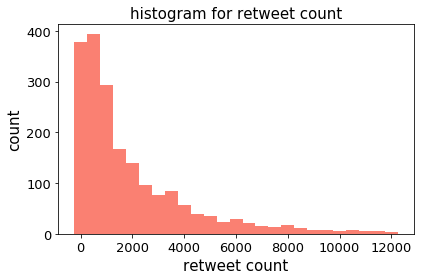

In [68]:
# compute some basic profile for the retweet count
x = df_tweet["retweet_count"]
print("mean:", np.mean(x), ", median:", np.median(x), ", min:", np.min(x), ", max:", np.max(x))

# plot a histogram for retweet
plt.hist(x, bins = np.arange(0, 13000, 500), 
         align = "left", color = "salmon")
plt.title("histogram for retweet count", fontsize = 15)
plt.xlabel("retweet count", fontsize = 15)
plt.ylabel("count", fontsize = 15)
plt.tick_params(axis='both', which='major', labelsize=13)
plt.tight_layout()
plt.savefig('hist_retweet.png')
plt.show()

Here for the plot, we have removed the outliers for which retweet count > 12000. It seems that **the retweet count obeys the exponential distribution** (here and below, the main insights we obtained are displayed in the bold-face).

In the same way, the distribution of the favorite count is 

mean: 8915.473657802308 , median: 4117.0 , min: 81 , max: 132056


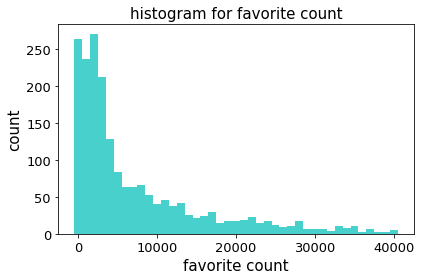

In [69]:
# compute some basic profile for the favorite count
x = df_tweet["favorite_count"]
print("mean:", np.mean(x), ", median:", np.median(x), ", min:", np.min(x), ", max:", np.max(x))

# plot a histogram for favorite count
plt.hist(x, bins = np.arange(0, 42000, 1000), align = "left", color = "mediumturquoise")
plt.title("histogram for favorite count", fontsize = 15)
plt.xlabel("favorite count", fontsize = 15)
plt.ylabel("count", fontsize = 15)
plt.tick_params(axis='both', which='major', labelsize=13)
plt.tight_layout()
plt.savefig('hist_favorite.png')
plt.show()

Here the outlies for which the favorite counts > 40000 are removed in 
the plot. We can see that **the favorite count also obeys the exponential distribution**. 

We next see the distribution of the rating:

mean: 1.170761952548202 , median: 1.1 , min: 0.0 , max: 177.6


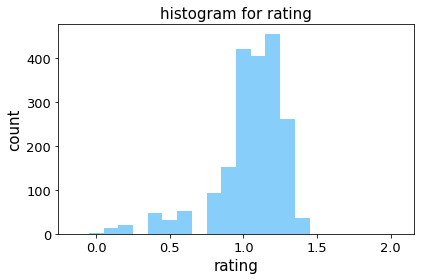

In [70]:
# compute some basic profile for rating
x = df_tweet["rating"]
print("mean:", np.mean(x), ", median:", np.median(x), ", min:", np.min(x), ", max:", np.max(x))

# plot a histogram for rating
plt.hist(x, bins = np.arange(-0.1, 2.2, 0.1), align = "left", color = "lightskyblue")
plt.title("histogram for rating", fontsize = 15)
plt.xlabel("rating", fontsize = 15)
plt.ylabel("count", fontsize = 15)
plt.tick_params(axis='both', which='major', labelsize=13)
plt.tight_layout()
plt.savefig('hist_rating.png')
plt.show()

In the plot, the outliers with the rating > 2 are removed. 
We can see that most of the tweets have rating around the mean value. 

As a next step, let us have a look at the scattering plot for 
retweet count vs favorite count:

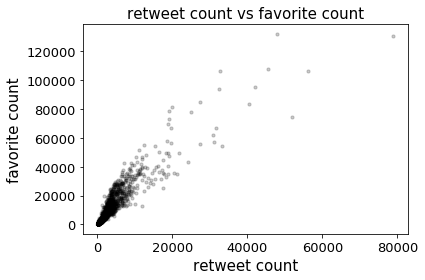

In [71]:
# scatter plot for retweet count vs favorite count
x = df_tweet["retweet_count"]
y = df_tweet["favorite_count"]
plt.scatter(x, y, s = 10, alpha = 0.2, color = "black")
plt.title("retweet count vs favorite count", fontsize = 15)
plt.xlabel("retweet count", fontsize = 15)
plt.ylabel("favorite count", fontsize = 15)
plt.tick_params(axis='both', which='major', labelsize=13)
plt.tight_layout()
plt.show()

In this plot, we can see some outliers with large retweet and favorite counts.
We thus neglect some outliers and plot again:

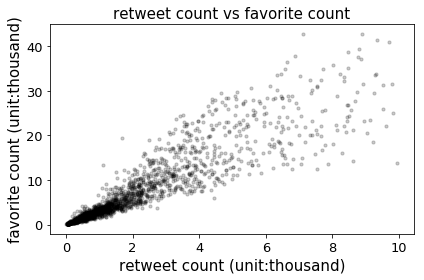

In [72]:
# scatter plot for retweet count vs favorite count (outliers removed)
list_ind = df_tweet[df_tweet["retweet_count"] <= 10000].index.values
x = df_tweet["retweet_count"][list_ind]
y = df_tweet["favorite_count"][list_ind]
plt.scatter(x*0.001, y*0.001, s = 10, alpha = 0.2, color = "black")
plt.title("retweet count vs favorite count", fontsize = 15)
plt.xlabel("retweet count (unit:thousand)", fontsize = 15)
plt.ylabel("favorite count (unit:thousand)", fontsize = 15)
plt.tick_params(axis='both', which='major', labelsize=13)
plt.tight_layout()
plt.savefig('scatter_retweet_vs_favorite.png')
plt.show()


Now we can see a positive correlation between retweet count and favorite dcount.
We can compute the correlation between these two counts as follows:

In [73]:
# computing correlation between retweet count and favorite count
cor = np.corrcoef(df_tweet["retweet_count"], df_tweet["favorite_count"])[0][1]
print("correlation between retweet count and favorite count:", cor)

correlation between retweet count and favorite count: 0.914885693989


Thus we have also statistically confirmed **the high correlation between 
the retweet count and favorite count**. 

We can also see the correlation between the rating and favorite/retweet count

In [74]:
# computing correlation between rating and favorite/retweet count
cor = np.corrcoef(df_tweet["rating"], df_tweet["favorite_count"])[0][1]
print("correlation between rating and favorite count:", cor)
cor = np.corrcoef(df_tweet["rating"], df_tweet["retweet_count"])[0][1]
print("correlation between rating and retweet count:", cor)

correlation between rating and favorite count: 0.0230562759264
correlation between rating and retweet count: 0.0239802791533


Thus the correlations seem to be very small. 
Even the outliers are removed and the only data with rating < 2 is considered, 
the correlations are 

In [75]:
# compute correlation between rating and favorite/retweet count 
# after the outliers rating >=2 are removed
list_ind = df_tweet[df_tweet["rating"] < 2].index.values
x = df_tweet["rating"][list_ind]
y1 = df_tweet["favorite_count"][list_ind]
y2 = df_tweet["retweet_count"][list_ind]

cor = np.corrcoef(x, y1)[0][1]
print("correlation between rating and favorite count (outliers removed):", cor)
cor = np.corrcoef(x, y2)[0][1]
print("correlation between rating and retweet count (outliers removed):", cor)

correlation between rating and favorite count (outliers removed): 0.402054046998
correlation between rating and retweet count (outliers removed): 0.303250366056


Thus **the correlation between the rating and the favorite/retweet count is not significant**. 
We can however see one interesting point from the rating vs favorite/reteet count:

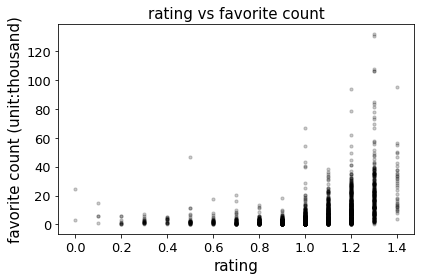

In [76]:
# scatter plot for rating vs favorite count (outliers removed)
list_ind = df_tweet[df_tweet["rating"] < 2].index.values
x = df_tweet["rating"][list_ind]
y = df_tweet["favorite_count"][list_ind]
plt.scatter(x, y*0.001, s = 10, alpha = 0.2, color = "black")
plt.title("rating vs favorite count", fontsize = 15)
plt.xlabel("rating", fontsize = 15)
plt.ylabel("favorite count (unit:thousand)", fontsize = 15)
plt.tick_params(axis='both', which='major', labelsize=13)
plt.tight_layout()
plt.savefig('scatter_rating_vs_favorite.png')
plt.show()

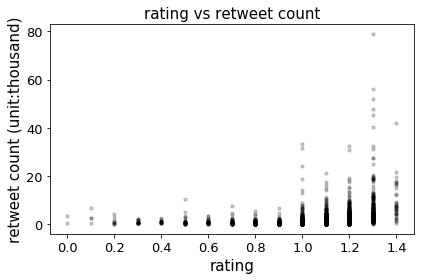

In [77]:
# scatter plot for rating vs retweet count (outliers removed)
list_ind = df_tweet[df_tweet["rating"] < 2].index.values
x = df_tweet["rating"][list_ind]
y = df_tweet["retweet_count"][list_ind]
plt.scatter(x, y*0.001, s = 10, alpha = 0.2, color = "black")
plt.title("rating vs retweet count", fontsize = 15)
plt.xlabel("rating", fontsize = 15)
plt.ylabel("retweet count (unit:thousand)", fontsize = 15)
plt.tick_params(axis='both', which='major', labelsize=13)
plt.tight_layout()
plt.savefig('scatter_rating_vs_retweet.png')
plt.show()

We can see that, **to have a very high favorite/retweet count, the tweet needs to 
have a high rating** (see the top-right part of the scatter plots). 